## Install Some Library

In [1]:
!pip install emoji
!pip install Sastrawi
!pip install google-play-scraper
!pip install umap-learn
!pip install simplemma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 MB 11.9 MB/s eta 0:00:00


## Import Library

In [2]:
import string
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import umap
import simplemma
from umap import UMAP
from google_play_scraper import Sort, reviews
from collections import Counter
warnings.filterwarnings('ignore')
sns.set(style='white', palette='muted', color_codes=True)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from gensim.models import Word2Vec
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Collection

In [3]:
result, continuation = reviews(
    'com.Info_BMKG',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)

In [4]:
df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7528e062-9548-462c-a0eb-3ec7ddecd921,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cukup akurat.. Tapi tolong untuk cuaca di bagu...,5,48,3.3.1,2024-10-28 08:29:53,None,NaT,3.3.1
1,0f6581a1-3673-4349-ae27-02f9b9a6d5fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Stuck di display putih tengahnya hanya ada log...,1,2,3.3.2,2024-10-31 08:10:00,None,NaT,3.3.2
2,27a862bd-d73e-4e2e-898d-eb1377494125,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ada baiknya di tambahkan alarm EWS pada aplika...,3,122,3.3.1,2024-08-13 16:07:59,None,NaT,3.3.1
3,2840ccff-ab86-4aaf-af66-3315cbe221b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Overall aplikasinya sudah bagus, tetapi tolong...",2,2,3.3.1,2024-10-24 17:34:40,None,NaT,3.3.1
4,afe756b1-ff62-4fba-8153-c2b9c85e0656,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong tambahkan banyak kota dibagian kualitas...,1,6,3.3.1,2024-09-25 07:01:35,None,NaT,3.3.1


In [5]:
df.to_csv('bmkg_raw_data.csv', index=False)

In [6]:
df.sort_values(by='at', ascending=False, inplace=True)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
16,43bc0db6-60c8-4cbb-8bfa-ba69c9c437d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk keseluruhan, sudah bagus. Saran saya tam...",5,0,3.3.2,2024-11-07 13:31:39,None,NaT,3.3.2
1887,d1cb69c0-f8fa-4610-90b1-d0f64122b8e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus.twrima kasih atas INFONYA,5,0,3.3.2,2024-11-07 02:02:39,None,NaT,3.3.2
4038,42392a8a-b6a6-423a-9a76-67abfb047aa6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sampah disini hujan tapi info dari BM...,1,0,None,2024-11-04 11:32:30,None,NaT,None
28,c245a52c-d48b-4e51-bf76-1c55cd68df2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi nya sangat informatif dan membantu,5,0,3.3.2,2024-11-04 06:30:37,None,NaT,3.3.2
84,9a4a0764-de8e-44aa-bec4-ad375cb8c4c2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali pada setiap kondisi.,5,0,3.3.2,2024-11-04 03:59:07,None,NaT,3.3.2
...,...,...,...,...,...,...,...,...,...,...,...
3127,0666d0e3-9b0b-424d-9200-3b6fefba7b66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sekali karena saya tinggal di rawan gemp...,5,0,2.4,2018-09-15 11:26:47,None,NaT,2.4
3022,91960812-894e-4406-9334-4fc725e7ac3b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong gan perbaharui mengenai hujan di indone...,3,1,2.4,2018-09-14 17:21:04,None,NaT,2.4
2969,d0ee1aac-29d7-48bf-aefa-73e4253f7621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk ini sangat membantu .dan saya dpat mengeta...,5,1,2.4,2018-09-14 12:26:23,None,NaT,2.4
3193,97e9cec9-5910-4ea2-8753-543eb940375f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi keren dari BMKG, membantu sekali.",5,1,2.4,2018-09-14 02:53:36,None,NaT,2.4


## Data Understanding

In [7]:
df.shape

(5000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 16 to 3086
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              5000 non-null   object        
 1   userName              5000 non-null   object        
 2   userImage             5000 non-null   object        
 3   content               5000 non-null   object        
 4   score                 5000 non-null   int64         
 5   thumbsUpCount         5000 non-null   int64         
 6   reviewCreatedVersion  3985 non-null   object        
 7   at                    5000 non-null   datetime64[ns]
 8   replyContent          50 non-null     object        
 9   repliedAt             50 non-null     datetime64[ns]
 10  appVersion            3985 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 468.8+ KB


In [9]:
df = df.iloc[:, 3:5]
df.reset_index(drop=True, inplace=True)
df.head()

,content,score
0,"Untuk keseluruhan, sudah bagus. Saran saya tam...",5
1,Bagus.twrima kasih atas INFONYA,5
2,Aplikasi sampah disini hujan tapi info dari BM...,1
3,Aplikasi nya sangat informatif dan membantu,5
4,sangat membantu sekali pada setiap kondisi.,5


In [10]:
def sentiment(score):
  if score <= 2:
    return 'Negative'
  elif score >= 4:
    return 'Positive'

df['score'] = df['score'].apply(lambda x: sentiment(x))

In [11]:
df.head()

,content,score
0,"Untuk keseluruhan, sudah bagus. Saran saya tam...",Positive
1,Bagus.twrima kasih atas INFONYA,Positive
2,Aplikasi sampah disini hujan tapi info dari BM...,Negative
3,Aplikasi nya sangat informatif dan membantu,Positive
4,sangat membantu sekali pada setiap kondisi.,Positive


## Data Cleansing

In [12]:
df.isnull().sum()

,0
content,0
score,568


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(4432, 2)

## Data Preprocessing

In [15]:
# casefolding
def casefolding(content):
  content = content.lower()
  return content

df['content'] = df['content'].apply(lambda x: casefolding(x))

In [16]:
df.head()

,content,score
0,"untuk keseluruhan, sudah bagus. saran saya tam...",Positive
1,bagus.twrima kasih atas infonya,Positive
2,aplikasi sampah disini hujan tapi info dari bm...,Negative
3,aplikasi nya sangat informatif dan membantu,Positive
4,sangat membantu sekali pada setiap kondisi.,Positive


In [17]:
# cleaning
def cleaning(content):
  content = content.strip(' ') # menghapus spasi di awal dan di akhir
  content = re.sub(r'\d+', '', content) # menghapus angka
  content = content.translate(str.maketrans('','', string.punctuation)) # menghapus punctuation
  content = re.sub(r'\b[a-zA-Z]\b', '', content) # menghapus kata yang hanya terdiri dari satu huruf
  content = re.sub(r'\s+', ' ', content) # menghapus spasi berlebih
  return content

df['content'] = df['content'].apply(lambda x: cleaning(x))

In [18]:
df.head()

,content,score
0,untuk keseluruhan sudah bagus saran saya tamba...,Positive
1,bagustwrima kasih atas infonya,Positive
2,aplikasi sampah disini hujan tapi info dari bm...,Negative
3,aplikasi nya sangat informatif dan membantu,Positive
4,sangat membantu sekali pada setiap kondisi,Positive


In [19]:
# emoji removal
def emoji_removal(content):
  content = emoji.replace_emoji(content, replace='')
  return content

df['content'] = df['content'].apply(lambda x: emoji_removal(x))

In [20]:
df.head()

,content,score
0,untuk keseluruhan sudah bagus saran saya tamba...,Positive
1,bagustwrima kasih atas infonya,Positive
2,aplikasi sampah disini hujan tapi info dari bm...,Negative
3,aplikasi nya sangat informatif dan membantu,Positive
4,sangat membantu sekali pada setiap kondisi,Positive


In [21]:
# emoticon removal
def remove_emoticons(content):
    emoticon_pattern = re.compile(r"""
        (?::|;|=) # Kolom, titik koma, atau tanda sama dengan untuk wajah
        (?:-)? # Tanda minus opsional
        (?:\)|\(|D|P|O|/|\\|S) # char yang menunjukkan ekspresi
        """, re.VERBOSE)

    return emoticon_pattern.sub(r'', content)

df['content'] = df['content'].apply(lambda x: remove_emoticons(x))

In [22]:
df.head()

,content,score
0,untuk keseluruhan sudah bagus saran saya tamba...,Positive
1,bagustwrima kasih atas infonya,Positive
2,aplikasi sampah disini hujan tapi info dari bm...,Negative
3,aplikasi nya sangat informatif dan membantu,Positive
4,sangat membantu sekali pada setiap kondisi,Positive


In [23]:
# tokenisasi
def tokenisasi(content):
  content = word_tokenize(content)
  return content

df['content'] = df['content'].apply(lambda x: tokenisasi(x))

In [24]:
df.head()

,content,score
0,"[untuk, keseluruhan, sudah, bagus, saran, saya...",Positive
1,"[bagustwrima, kasih, atas, infonya]",Positive
2,"[aplikasi, sampah, disini, hujan, tapi, info, ...",Negative
3,"[aplikasi, nya, sangat, informatif, dan, memba...",Positive
4,"[sangat, membantu, sekali, pada, setiap, kondisi]",Positive


In [25]:
# lemmatisasi
def lemmatisasi(content):
  return [simplemma.lemmatize(word, lang='id') for word in content]

df['content_lemma'] = df['content'].apply(lambda x: lemmatisasi(x))

In [26]:
df.head()

,content,score,content_lemma
0,"[untuk, keseluruhan, sudah, bagus, saran, saya...",Positive,"[untuk, keseluruhan, sudah, bagus, saran, saya..."
1,"[bagustwrima, kasih, atas, infonya]",Positive,"[bagustwrima, kasih, atas, infonya]"
2,"[aplikasi, sampah, disini, hujan, tapi, info, ...",Negative,"[aplikasi, sampah, disini, hujan, tapi, info, ..."
3,"[aplikasi, nya, sangat, informatif, dan, memba...",Positive,"[aplikasi, nya, sangat, informatif, dan, bantu]"
4,"[sangat, membantu, sekali, pada, setiap, kondisi]",Positive,"[sangat, bantu, sekali, pada, setiap, kondisi]"


In [27]:
# stopword
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

nltk_stopword = stopwords.words('indonesian')

combine_stopwords = set(sastrawi_stopwords + nltk_stopword)

def stopwords(content):
  content = [word for word in content if word not in combine_stopwords]
  return content

df['content_lemma'] = df['content_lemma'].apply(lambda x: stopwords(x))

In [28]:
df.head()

,content,score,content_lemma
0,"[untuk, keseluruhan, sudah, bagus, saran, saya...",Positive,"[bagus, saran, mode, gelap, aplikasi]"
1,"[bagustwrima, kasih, atas, infonya]",Positive,"[bagustwrima, kasih, infonya]"
2,"[aplikasi, sampah, disini, hujan, tapi, info, ...",Negative,"[aplikasi, sampah, hujan, info, bmkg, gk, huja..."
3,"[aplikasi, nya, sangat, informatif, dan, memba...",Positive,"[aplikasi, nya, informatif, bantu]"
4,"[sangat, membantu, sekali, pada, setiap, kondisi]",Positive,"[bantu, kondisi]"


In [29]:
# removal of frequent words
word_frequency_pos = df[df['score'] == 'Positive']['content_lemma']
word_frequency_neg = df[df['score'] == 'Negative']['content_lemma']

positive_words = [word for tokens in word_frequency_pos for word in tokens]
negative_words = [word for tokens in word_frequency_neg for word in tokens]

positive_freq_dic = FreqDist(positive_words)
negative_freq_dic = FreqDist(negative_words)

display(positive_freq_dic, negative_freq_dic)

FreqDist({'gempa': 1000, 'aplikasi': 996, 'bantu': 788, 'cuaca': 657, 'bagus': 639, 'informasi': 475, 'yg': 459, 'bmkg': 433, 'info': 406, 'nya': 385, ...})

FreqDist({'gempa': 470, 'aplikasi': 433, 'update': 262, 'nya': 201, 'cuaca': 184, 'info': 178, 'yg': 175, 'gak': 173, 'buka': 151, 'bmkg': 138, ...})

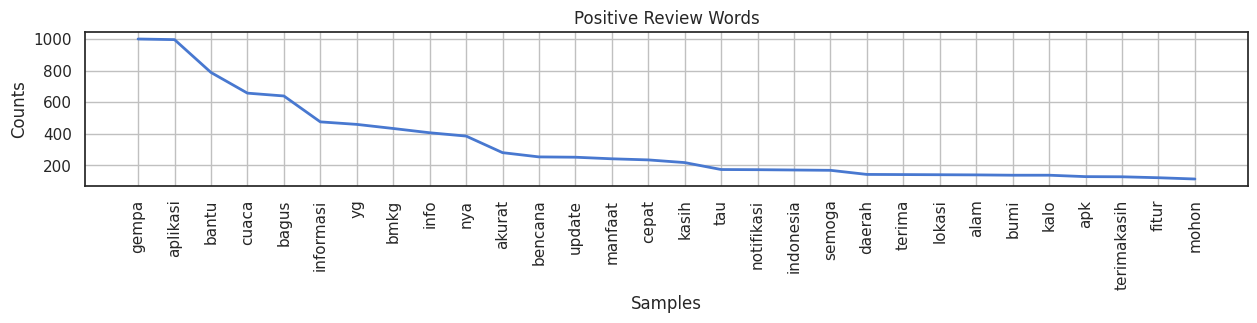

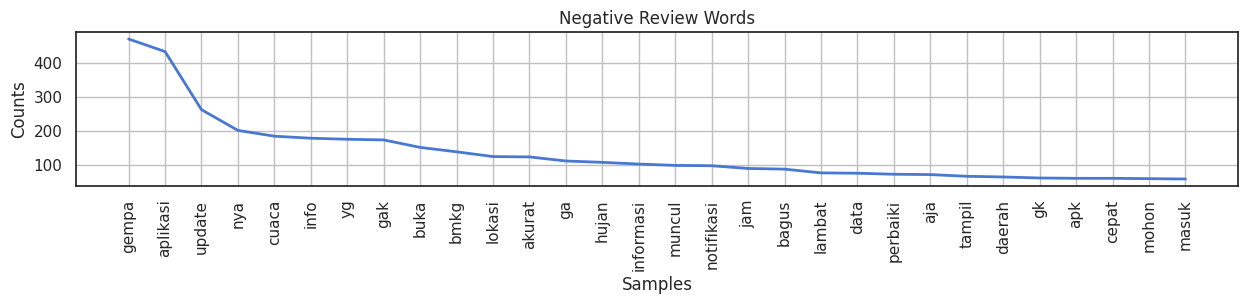

In [30]:
# visualisasi top 30 kata
plt.figure(figsize=(15,2))
positive_freq_dic.plot(30,  title='Positive Review Words');

plt.figure(figsize=(15,2))
negative_freq_dic.plot(30, title='Negative Review Words');

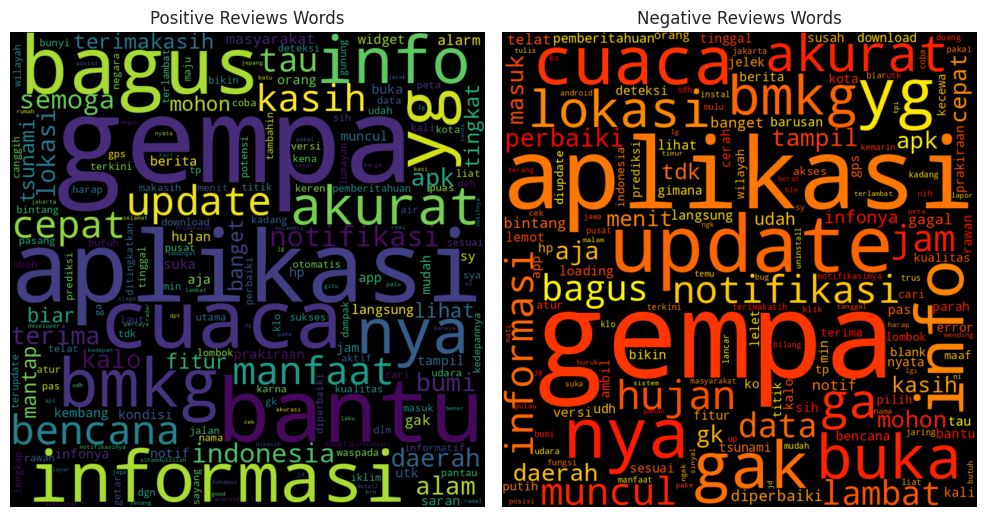

In [31]:
def plot_important_words(pos_dic, neg_dic):
    fig, ax=plt.subplots(ncols=2, figsize=(10,10))

    wc = WordCloud(background_color='black',\
                min_font_size=8, width=800, height=800,\
                        colormap=None ).generate_from_frequencies(pos_dic)
    ax[0].imshow(wc, interpolation='bilinear')
    ax[0].set_title('Positive Reviews Words')
    ax[0].axis('off');

    wc = WordCloud(background_color='black',\
               min_font_size=12, width=800, height=800,\
                     colormap='autumn' ).generate_from_frequencies(neg_dic)
    ax[1].imshow(wc, interpolation='bilinear' )
    ax[1].set_title('Negative Reviews Words')
    ax[1].axis('off');

    fig.set_tight_layout({'pad':1})

plot_important_words(positive_freq_dic, negative_freq_dic)

In [32]:
pos=set(x[0] for x in positive_freq_dic.most_common(20))
neg=set(x[0] for x in negative_freq_dic.most_common(20))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'notifikasi', 'nya', 'bmkg', 'informasi', 'update', 'aplikasi', 'akurat', 'bagus', 'yg', 'cuaca', 'info', 'gempa'}

Dari 20 kata terdapat 12 yang sama


In [33]:
pos=set(x[0] for x in positive_freq_dic.most_common(100))
neg=set(x[0] for x in negative_freq_dic.most_common(100))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'notifikasi', 'banget', 'nya', 'hujan', 'informasi', 'udah', 'notif', 'titik', 'orang', 'masuk', 'prakiraan', 'kalo', 'ga', 'buka', 'aplikasi', 'indonesia', 'kota', 'cepat', 'langsung', 'bencana', 'info', 'min', 'bintang', 'gak', 'bantu', 'tsunami', 'pemberitahuan', 'infonya', 'lokasi', 'kasih', 'apk', 'bmkg', 'wilayah', 'prediksi', 'data', 'perbaiki', 'akurat', 'bagus', 'lihat', 'yg', 'muncul', 'update', 'tinggal', 'aja', 'terima', 'sih', 'hp', 'mohon', 'tampil', 'berita', 'pas', 'daerah', 'cari', 'menit', 'tdk', 'download', 'fitur', 'cuaca', 'app', 'tau', 'gempa', 'jam'}

Dari 100 kata terdapat 62 yang sama


In [34]:
more_stop_word =[
    'atidakr', 'sama', 'saya', 'kalau', 'terjadi', 'untuk', 'jam', 'dini', 'tidak',
    'yang', 'bisa', 'di', 'baik', 'lama', 'lebih', 'apa', 'selalu', 'notif', 'kejadian',
    'padahal', 'bencana', 'terimakasih', 'ada', 'santidakt', 'apk', 'banget', 'banyak',
    'cuaca', 'notifikasi', 'kasih', 'hujan', 'buka', 'masuk', 'lokasi', 'sering', 'terus',
    'baru', 'app', 'jutidak', 'dulu', 'sekali', 'update', 'buat', 'kurang', 'terima', 'akurat',
    'tsunami', 'malah', 'jadi', 'baru', 'tsunami', 'semotidak', 'kok', 'alarm', 'hp', 'mengambil',
    'saran', 'indonesia', 'santidakt', 'jutidak', 'jutidak', 'apk', 'infonya', 'notifikasi', 'peringatan',
    'sayarat', 'tdk', 'terbaru', 'hujan', 'dentidakn', 'cuacanya', 'terima', 'mohon', 'barusan', 'semoga',
    'kejadian', 'muncul', 'langsung', 'kasih', 'terimakasih', 'aplikasi', 'perintidaktan', 'tingtidakl',
    'pengguna', 'tau', 'prediksi', 'info', 'biar', 'banget', 'update', 'jantidakn', 'fitur', 'ngtidak',
    'prakiraan', 'sih', 'masuk', 'gps', 'app', 'gempanya', 'data', 'nya', 'jam', 'hp', 'menit', 'kota',
    'ngtidak', 'bencana', 'daerah', 'cepat', 'buka', 'pas', 'aplikasinya', 'sesuai', 'santidakt', 'alam',
    'tampilan', 'bagus', 'pemberitahuan', 'titik', 'wilayah', 'bmkg', 'versi', 'msudah','gempa', 'min', 'ga',
    'notif', 'cuaca', 'lokasi', 'developer', 'informasi', 'bumi', 'tidaktidak1', 'masayaarakat', 'berawan', 'batidakimana',
    'perbaiki', 'widget', 'kadang', 'download', 'orang', 'klo', 'sehingtidak', 'diperbaiki', 'jepang', 'mentidakmbil',
    'bunyi', 'tidaktidakl', 'perkiraan', 'gk', 'bintang', 'cerah', 'bikin', 'kali', 'dibuka', 'ditingkatkan', 'tingtidak1', 'membantu',
    'yg', 'gak', 'aja', 'masyarakat', 'lihat', 'tingkat', 'kalo', 'bantu', 'udah', 'tampil', 'kembang', 'utk', 'ambil', 'berita',
    'kondisi', 'laut', 'pantau', 'suara', 'deteksi', 'jalan', 'terkini', 'sy'
]


positive2_freq_dic={key:value for key,value in positive_freq_dic.items() if key not in more_stop_word}
negative2_freq_dic={key:value for key,value in negative_freq_dic.items() if key not in more_stop_word}

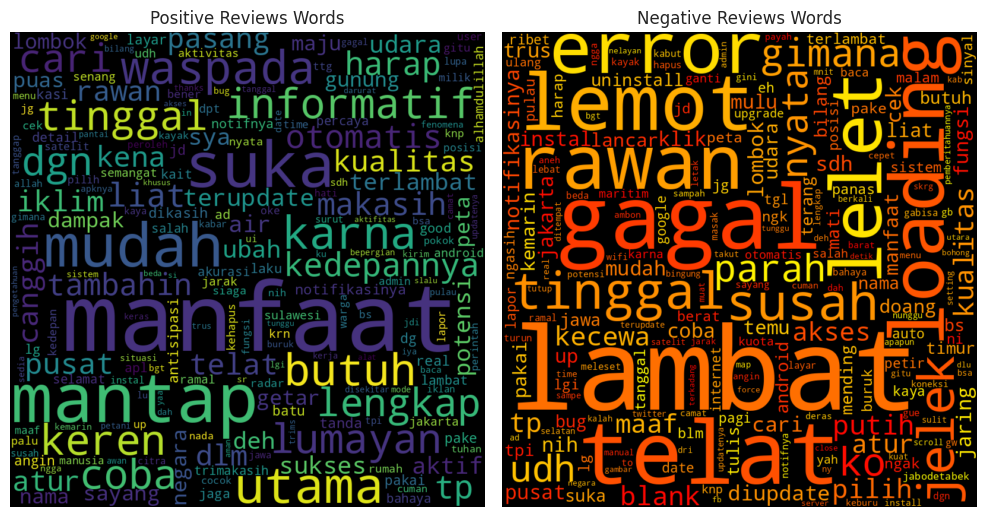

In [35]:
plot_important_words(positive2_freq_dic, negative2_freq_dic)

In [36]:
# stopword removal pt2
def more_stopword(content):
  content = [word for word in content if word not in more_stop_word]
  return content

df['content_lemma'] = df['content_lemma'].apply(lambda x: more_stopword(x))

In [37]:
df.head()

,content,score,content_lemma
0,"[untuk, keseluruhan, sudah, bagus, saran, saya...",Positive,"[mode, gelap]"
1,"[bagustwrima, kasih, atas, infonya]",Positive,[bagustwrima]
2,"[aplikasi, sampah, disini, hujan, tapi, info, ...",Negative,[sampah]
3,"[aplikasi, nya, sangat, informatif, dan, memba...",Positive,[informatif]
4,"[sangat, membantu, sekali, pada, setiap, kondisi]",Positive,[]


In [38]:
# stemming
def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = []
  for i in content:
    x = stemmer.stem(i)
    text.append(x)
  content_clean = []
  content_clean = ' '.join(text)
  return content_clean

df['content_stemm'] = df['content_lemma'].apply(lambda x: stemming(x))
df.to_csv('bmkg_prepross_data.csv', index=False)

In [39]:
path = '/content/bmkg_prepross_data.csv'

df_prepross = pd.read_csv(path)
df_prepross.head()

,content,score,content_lemma,content_stemm
0,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap
1,"['bagustwrima', 'kasih', 'atas', 'infonya']",Positive,['bagustwrima'],bagustwrima
2,"['aplikasi', 'sampah', 'disini', 'hujan', 'tap...",Negative,['sampah'],sampah
3,"['aplikasi', 'nya', 'sangat', 'informatif', 'd...",Positive,['informatif'],informatif
4,"['sangat', 'membantu', 'sekali', 'pada', 'seti...",Positive,[],NaN


In [40]:
df_prepross.shape

(4432, 4)

In [41]:
df_prepross.isnull().sum()

,0
content,0
score,0
content_lemma,0
content_stemm,534


In [42]:
df_clean = df_prepross.dropna()

In [43]:
df_clean.shape

(3898, 4)

In [44]:
df_clean.head()

,content,score,content_lemma,content_stemm
0,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap
1,"['bagustwrima', 'kasih', 'atas', 'infonya']",Positive,['bagustwrima'],bagustwrima
2,"['aplikasi', 'sampah', 'disini', 'hujan', 'tap...",Negative,['sampah'],sampah
3,"['aplikasi', 'nya', 'sangat', 'informatif', 'd...",Positive,['informatif'],informatif
5,"['selalu', 'mengikutiuntuk', 'mendapatkan', 'i...",Positive,"['mengikutiuntuk', 'tentamg', 'fenomena', 'ikl...",mengikutiuntuk tentamg fenomena iklim


In [45]:
df_clean.rename(columns={'content': 'review', 'score': 'sentiment'}, inplace=True)
df_clean.head()

,review,sentiment,content_lemma,content_stemm
0,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap
1,"['bagustwrima', 'kasih', 'atas', 'infonya']",Positive,['bagustwrima'],bagustwrima
2,"['aplikasi', 'sampah', 'disini', 'hujan', 'tap...",Negative,['sampah'],sampah
3,"['aplikasi', 'nya', 'sangat', 'informatif', 'd...",Positive,['informatif'],informatif
5,"['selalu', 'mengikutiuntuk', 'mendapatkan', 'i...",Positive,"['mengikutiuntuk', 'tentamg', 'fenomena', 'ikl...",mengikutiuntuk tentamg fenomena iklim


In [46]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,review,sentiment,content_lemma,content_stemm
0,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap
1,"['bagustwrima', 'kasih', 'atas', 'infonya']",Positive,['bagustwrima'],bagustwrima
2,"['aplikasi', 'sampah', 'disini', 'hujan', 'tap...",Negative,['sampah'],sampah
3,"['aplikasi', 'nya', 'sangat', 'informatif', 'd...",Positive,['informatif'],informatif
4,"['selalu', 'mengikutiuntuk', 'mendapatkan', 'i...",Positive,"['mengikutiuntuk', 'tentamg', 'fenomena', 'ikl...",mengikutiuntuk tentamg fenomena iklim


In [47]:
df_clean.sample(10)

,review,sentiment,content_lemma,content_stemm
294,"['sangat', 'bagus', 'membatu', 'pekerjaan', 'k...",Positive,"['batu', 'pekerja', 'ku', 'makasih']",batu kerja ku makasih
465,"['untuk', 'ramalan', 'cuaca', 'per', 'jamnya',...",Negative,"['ramal', 'diupdate']",ramal diupdate
2426,"['infonya', 'terlambat', 'kita', 'udah', 'mera...",Negative,"['terlambat', 'dri', 'bru', 'dikasih', 'pusat'...",lambat dri bru kasih pusat gempax dimna
3754,"['infonya', 'kalo', 'bisa', 'jgn', 'terlalu', ...",Positive,"['jgn', 'terlambat']",jgn lambat
604,"['maaf', 'aku', 'kurangi', 'lagi', 'bintangnya...",Positive,"['maaf', 'kurangi', 'jaring', 'tp', 'susah', '...",maaf kurang jaring tp susah main game online g...
2946,"['sangat', 'bermanfaat', 'sekaligempacuacadllb...",Positive,"['manfaat', 'sekaligempacuacadllbagus', 'deh',...",manfaat sekaligempacuacadllbagus deh pokok
829,"['apaan', 'si', 'abis', 'di', 'update', 'jadi'...",Negative,"['si', 'abis']",si abis
302,"['aplikasi', 'yang', 'sangat', 'membantu', 'co...",Positive,"['coba', 'pertimbangkan', 'atur', 'dasar', 'ra...",coba timbang atur dasar radius jarak pusat ama...
376,"['udah', 'bagus', 'dari', 'segi', 'ui', 'ux', ...",Positive,"['segi', 'ui', 'ux', 'tertera']",segi ui ux tera
1328,"['saya', 'asli', 'kalimantan', 'timur', 'saya'...",Negative,"['asli', 'kalimantan', 'timur', 'aceh', 'sambu...",asli kalimantan timur aceh sambut masjid jawa ...


In [48]:
df_clean.to_csv('bmkg_clean_data.csv')

## Feature Engineering

### TF-IDF

In [49]:
tfidf = TfidfVectorizer(
    use_idf=True,
    smooth_idf=True,
    max_features=1500
)

response = tfidf.fit_transform(df_clean['content_stemm'])

df_tfidf = pd.DataFrame(
    response.toarray(),
    columns=tfidf.get_feature_names_out()
)

df_tfidf.head()

,aamiin,abis,aceh,ad,ada,adax,admin,adu,agustus,ah,...,wkwk,wkwkwk,yaa,yaaa,yah,yng,you,youtube,zona,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
response.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
reducer = UMAP()
X_umap = reducer.fit_transform(response.toarray())

df_clean['umap_1'] = X_umap[:, 0]
df_clean['umap_2'] = X_umap[:, 1]

In [52]:
df_clean['sentiment'] = df_clean['sentiment'].map({'Positive': 1, 'Negative': 0})

In [53]:
fig = px.scatter(df_clean, x='umap_1', y='umap_2', color='sentiment', title='UMAP Visualization of BMKG App Reviews Use Tf-Idf', text='content_stemm')
fig.update_layout(height=650)
fig.show()

### Word2Vec

In [54]:
sentences = []
for content_lemma in df['content_lemma']:
  sentences.append(word_tokenize(" ".join(content_lemma)))

sentences = [sentence for sentence in sentences if sentence]
sentences[:10]

[['mode', 'gelap'],
 ['bagustwrima'],
 ['sampah'],
 ['informatif'],
 ['mengikutiuntuk', 'tentamg', 'fenomena', 'iklim'],
 ['mantap'],
 ['rivaldi', 'ristiandi', 'pratama'],
 ['manfaat'],
 ['berkat', 'tangan'],
 ['awan', 'lambang', 'matahari', 'gitu']]

In [55]:
w2vec = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=3,
    sg=0
)

w2vec.save('word2vec.model')

In [56]:
model_w2vec = Word2Vec.load('word2vec.model')

In [57]:
w2v = model_w2vec.wv
w2v.index_to_key[:10]

['manfaat',
 'mantap',
 'suka',
 'mudah',
 'lambat',
 'telat',
 'tinggal',
 'utama',
 'rawan',
 'butuh']

In [58]:
w2v.most_similar('rawan')

[('udh', 0.8314981460571289),
 ('tinggal', 0.8159767389297485),
 ('angin', 0.8112961649894714),
 ('lg', 0.7915338277816772),
 ('gimana', 0.7900511026382446),
 ('jd', 0.7865845561027527),
 ('nama', 0.7824653387069702),
 ('liat', 0.7822368144989014),
 ('pilih', 0.7779663801193237),
 ('gagal', 0.7768514752388)]

In [59]:
X = UMAP().fit_transform(w2v.vectors)

df2 = pd.DataFrame(X, columns=['umap1', 'umap2'])
df2['word'] = w2v.index_to_key

fig = px.scatter(df2, x='umap1', y='umap2', text='word')
fig.update_traces(textposition='top center')
fig.update_layout(height = 800,
                  title_text = 'Word2Vec Visualization')
fig.show()

In [60]:
df2.head()

,umap1,umap2,word
0,2.053116,8.033256,manfaat
1,3.924856,6.795049,mantap
2,1.823873,7.669105,suka
3,1.883910,7.797321,mudah
4,3.030131,7.428929,lambat


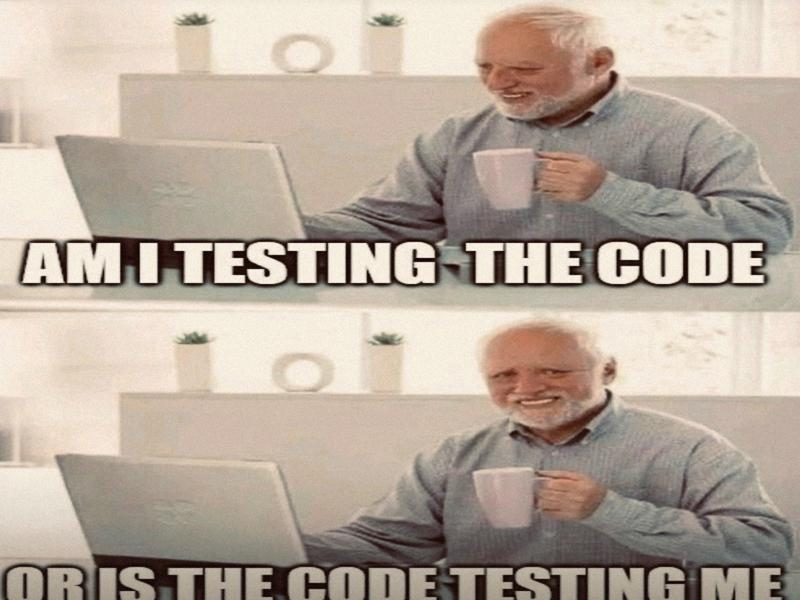

In [61]:
from IPython.display import Image

Image(filename='/content/resized_image.jpg')